# Caso 2: Introducción conceptual al Aprendizaje Automático
_Del curso "Python y Machine Learning: de 0 a 100 con Reinforcement Learning"_ <br/>
_Impartido por MalagaAI, [Andrés Matesanz][mate] y [Joaquín Terrasa][quim]_ <br/>
_27 de Marzo de 2020_ <br/>

<small>Capítulo anterior (Introducción a Python): https://github.com/Matesanz/C0-intro-python</small>

[quim]: https://twitter.com/josocjoq
[mate]: https://twitter.com/AIMatesanz

---

Vamos a ver brevemente los fundamentos del Aprendizaje Automático (AA) o *Machine Learning* (ML). Informalmente, entendemos como Inteligencia Artificial (IA) todo conjunto de técnicas que permiten a máquinas realizar tareas características del ser humano, como reconocimiento de imágenes o traducción entre lenguajes. Por ejemplo, los algoritmos definidos por reglas se consideran IA; aún así, éstos no aprenden por sí solos.

El aprendizaje automático es una "rama" de la IA que agrupa **algoritmos que pueden aprender comportamientos sin ser explícitamente programados para ello**. Dentro del machine learning consideramos 3 categorías principales:

<img src="https://i.imgur.com/RlvdIc1.jpg" width="50%"/>

+ Aprendizaje **supervisado**: el algoritmo aprende **a partir de un conjunto de datos (*dataset*) etiquetados**. Por ejemplo, si la tarea es aprender a distinguir entre gatos y perros, el dataset son fotos de gatos etiquetadas con 'gato', y fotos de perros etiquetadas con 'perro'.
+ Aprendizaje **no supervisado**: el algoritmo aprende **a partir de datos sin etiquetar**. Generalmente, se suelen usar para agrupar los datos en categorías. Un ejemplo es el algoritmo `k-medias` (imagen más abajo).
+ Aprendizaje **por refuerzo**: el algoritmo aprende a partir de datos sin etiquetar, usando un **procedimiento de prueba y error**. Usando un mecanismo de aprendizaje disruptivo, permite aprender nuevos comportamientos, no solo limitados a los del ser humano, pues no aprende explícitamente de éstos. Por ello, tiene gran popularidad en algoritmos para superar a jugadores humanos.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Iris_Flowers_Clustering_kMeans.svg/1920px-Iris_Flowers_Clustering_kMeans.svg.png" width="30%"/>


Uno de los paquetes más útiles cuando comienzas a realizar *aprendizaje automático* en Python es [`scikit-learn`][web].

<img src="https://miro.medium.com/max/1400/1*hjjC5Hi-PfEWLMEXHr6gdQ.png" width="30%"/>

👉 [mas info][art] 👈

[art]: https://code.tutsplus.com/es/tutorials/introduction-to-machine-learning-in-python--cms-30623
[web]: https://scikit-learn.org/stable/index.html

In [3]:
# !pip install sklearn
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.datasets as _data
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [11]:
iris_raw = _data.load_iris()
type(iris_raw)

sklearn.utils.Bunch

In [12]:
iris_raw

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

([], <a list of 0 Text major ticklabel objects>)

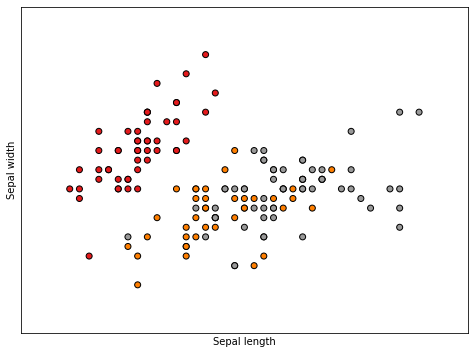

In [19]:
%matplotlib inline

X = iris_raw.data[:, :2]  # we only take the first two features.
y = iris_raw.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [14]:
iris = pd.DataFrame(iris_raw["data"], columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
iris["species"] = iris_raw["target"]

iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [15]:
iris.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [16]:
def map_category_to_name(species_class):
    return {
        0: "setosa",
        1: "versicolor",
        2: "virginica"
    }.get(species_class)

iris["species_name"] = iris["species"].apply(map_category_to_name)

iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


### Familias de algoritmos

+ *Support Vector Machines (SVM)*: [aplicados al dataset Iris](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html).
+ Regresión Logística: [aplicada a Iris](https://github.com/VictorMotogna/IrisLogisticRegression).
+ *K-Nearest Neighbors*: [aplicado a Iris](). ¿Más info de cómo funciona? [aquí](https://www.cs.us.es/cursos/rac-2017/temas/tema-02.pdf).
+ XGBoost: [aplicado a Iris](https://www.kdnuggets.com/2017/03/simple-xgboost-tutorial-iris-dataset.html).
+ Red Neuronal Simple: [aplicada a Iris](https://www.bogotobogo.com/python/scikit-learn/Perceptron_Model_with_Iris_DataSet.php).
+ *K-Means*: [aplicada a Iris](https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187).

A continuación hay varios algoritmos escogidos del conjunto de ejemplos de `sklearn`

#### Agrupamiento jerárquico (*Hierarchical clustering*)

*It is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram)*:

https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

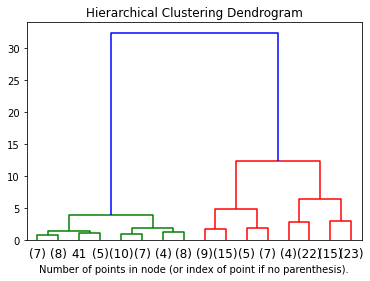

In [20]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


#### Árboles de decisión

*Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features:*

https://scikit-learn.org/stable/modules/tree.html#tree

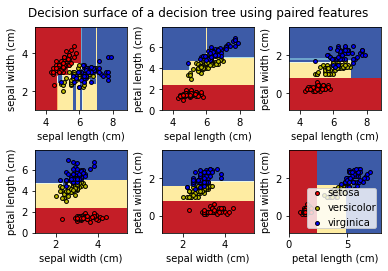

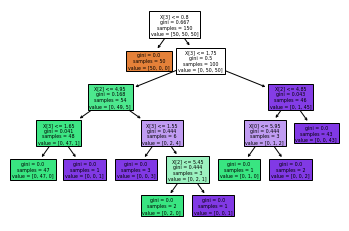

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()


### Support Vector Machines

*Support vector machines (SVMs) are a set of supervised learning methods. They bring the following advantages to ML:*

+ *Effective in high dimensional spaces.*
+ *Still effective in cases where number of dimensions is greater than the number of samples.*
+ *Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.*
+ *Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.*

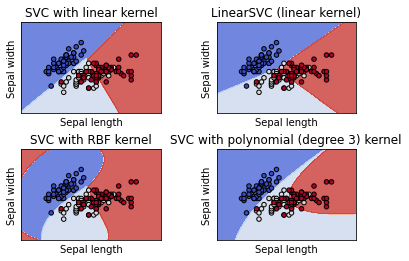

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Perceptrón Simple

In [32]:
iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

+ **Selección de los datos de entrenamiento** (70% aquí) **y datos de prueba** (30% aquí).

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  # aqui se escogen

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))

There are 105 samples in the training set and 45 samples in the test set


+ **Pre-procesamiento** de los datos (en este caso, **normalización con media 0 y varianza unitaria**. <br/> [saber más](https://scikit-learn.org/stable/modules/preprocessing.html) 🔥🔥

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


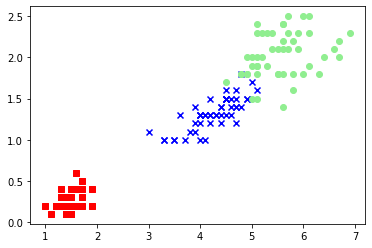

In [35]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)

In [37]:
help(Perceptron)

Help on class Perceptron in module sklearn.linear_model._perceptron:

class Perceptron(sklearn.linear_model._stochastic_gradient.BaseSGDClassifier)
 |  Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)
 |  
 |  Perceptron
 |  
 |  Read more in the :ref:`User Guide <perceptron>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  penalty : {'l2','l1','elasticnet'}, default=None
 |      The penalty (aka regularization term) to be used.
 |  
 |  alpha : float, default=0.0001
 |      Constant that multiplies the regularization term if regularization is
 |      used.
 |  
 |  fit_intercept : bool, default=True
 |      Whether the intercept should be estimated or not. If False, the
 |      data is assumed to be already centered.
 |  
 |  max_iter : int, default=1000
 |      The maximum number of pas

In [41]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(tol=1e-5, eta0=0.1, random_state=0)

ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)

print('Misclassfied samples: %d' % (y_test != y_pred).sum())

Misclassfied samples: 5


In [42]:
from sklearn.metrics import accuracy_score
print ('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.89


In [44]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', 
                   alpha=1.0, linewidth=1, marker='o',
                   s=55, label="test set")


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
c:\users\pachacho\miniconda3\envs\pycourse\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Using a string of single character

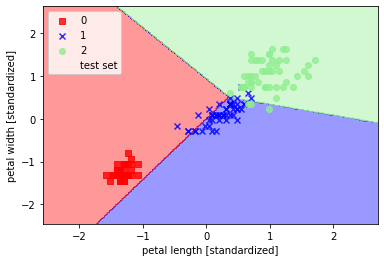

In [45]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()


### Datos esparcidos o *Sparse Data*

En ocasiones, trabajaremos con conjuntos de datos casi vacíos - ocurre por ejemplo, en algoritmos de recomendación y de procesamiento de lenguajes. Ésto supone un problema, pues podemos tener matrices enoooooormes (con lo que ocupan recursos del sistema) cuando en realidad los datos útiles son una décima parte. En Python lo solucionamos con `pandas`.

<img src="https://miro.medium.com/max/1400/1*_k7neNsac5zH5cQn7hst6Q.png"/>

In [25]:
import pandas as pd


    
data = pd.read_csv("http://files.grouplens.org/datasets/movielens/ml-100k/u.data", sep="\t", header=None, engine='python')
data.columns = ["user_id", "item_id", "rating", "timestamp"]
data.drop(["timestamp"], axis=1, inplace=True)
display(data.head())
display(data.shape)

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


(100000, 3)

In [26]:
BYTES_TO_MB_DIV = 0.000001
def print_memory_usage_of_data_frame(df):
    mem = round(df.memory_usage().sum() * BYTES_TO_MB_DIV, 3) 
    print("Memory usage is " + str(mem) + " MB")
    
print_memory_usage_of_data_frame(data)


Memory usage is 2.4 MB


In [29]:
# One-hot encoding

data_one_hot = pd.get_dummies(data, columns=['user_id', 'item_id'])  # Converts categorical variable into dummy/indicator variables.

display(data_one_hot.head())
display(data_one_hot.shape)

print_memory_usage_of_data_frame(data_one_hot)

,rating,user_id_1,user_id_2,user_id_3,user_id_4,user_id_5,user_id_6,user_id_7,user_id_8,user_id_9,...,item_id_1673,item_id_1674,item_id_1675,item_id_1676,item_id_1677,item_id_1678,item_id_1679,item_id_1680,item_id_1681,item_id_1682
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(100000, 2626)

Memory usage is 263.3 MB


In [ ]:
def convert_to_sparse_pandas(df, exclude_columns=[]):
    """
    Converts columns of a data frame into SparseArrays and returns the data frame with transformed columns.
    Use exclude_columns to specify columns to be excluded from transformation.
    :param df: pandas data frame
    :param exclude_columns: list
        Columns not be converted to sparse
    :return: pandas data frame
    """
    df = df.copy()
    exclude_columns = set(exclude_columns)

    for (columnName, columnData) in df.iteritems():
        if columnName in exclude_columns:
            continue
        df[columnName] = pd.arrays.SparseArray(columnData.values, dtype='uint8')

    return df

In [31]:
data_one_hot_sparse = convert_to_sparse_pandas(data_one_hot, exclude_columns=['rating'])

display(data_one_hot_sparse.dtypes)

c:\users\pachacho\miniconda3\envs\pycourse\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: The pandas.SparseArray class is deprecated and will be removed from pandas in a future version. Use pandas.arrays.SparseArray instead.
  app.launch_new_instance()


rating                     int64
user_id_1       Sparse[uint8, 0]
user_id_2       Sparse[uint8, 0]
user_id_3       Sparse[uint8, 0]
user_id_4       Sparse[uint8, 0]
                      ...       
item_id_1678    Sparse[uint8, 0]
item_id_1679    Sparse[uint8, 0]
item_id_1680    Sparse[uint8, 0]
item_id_1681    Sparse[uint8, 0]
item_id_1682    Sparse[uint8, 0]
Length: 2626, dtype: object

NameError: name 'print_memory_usage_of_sparse_data_frame' is not defined

In [38]:
print_memory_usage_of_data_frame(data_one_hot_sparse)

Memory usage is 1.8 MB


Otra opción...

In [39]:
data_one_hot_sparse = pd.get_dummies(data, columns=['user_id', 'item_id'], sparse=True)

display(data_one_hot_sparse.dtypes)

print_memory_usage_of_data_frame(data_one_hot_sparse)

rating                     int64
user_id_1       Sparse[uint8, 0]
user_id_2       Sparse[uint8, 0]
user_id_3       Sparse[uint8, 0]
user_id_4       Sparse[uint8, 0]
                      ...       
item_id_1678    Sparse[uint8, 0]
item_id_1679    Sparse[uint8, 0]
item_id_1680    Sparse[uint8, 0]
item_id_1681    Sparse[uint8, 0]
item_id_1682    Sparse[uint8, 0]
Length: 2626, dtype: object

Memory usage is 1.8 MB


👉 [mas info](https://towardsdatascience.com/working-with-sparse-data-sets-in-pandas-and-sklearn-d26c1cfbe067). 👈

### Inteligencia Artificial *Ética*

Una tendencia que está tomando mucha relevancia actualmente es la de la ética aplicada a IA. Por poner un ejempo, imaginemos una IA que determina si una imagen es de una fiesta o no. Por ejemplo,

<table>
    <tr>
        <td><img src="https://i.imgur.com/lXF673S.png" width="30%"/></td>
        <td><img src="https://i.imgur.com/LhoK3kf.jpg" width="80%"/></td>
    </tr>
</table>

<br/>

Ambas imágenes se consideran fiestas. ¿Qué pasaría si la IA solo entrenase con imágenes como la segunda? Y si sólo fuese entrenada con imágenes de gente de tez blanca, ¿reconocería la siguiente imagen como una fiesta o no?

<img src="https://i.imgur.com/VHjmZc4.jpg" width="20%"/>

Este tema es bastante amplio y para nada determinista, por lo que te recomiendo que busques los recursos por tu cuenta.

#### Extras

+ [Crash Course de Google en ML](https://developers.google.com/machine-learning/crash-course?hl=es-419).
+ [**Curso de la UC3M sobre Aprendizaje Automático**](http://ocw.uc3m.es/ingenieria-informatica/aprendizaje-automatico-para-el-analisis-de-datos/material-de-clase).
+ [Algoritmos de ML comparados: Python vs R](https://www.analyticsvidhya.com/blog/2015/09/full-cheatsheet-machine-learning-algorithms/).
+ [Aprendizaje Automático en paralelo](https://github.com/ogrisel/parallel_ml_tutorial).
+ [Machine Learning by Chris Albon](https://chrisalbon.com/#machine_learning).

<br/>
<br/>
<br/>

[<img src="https://miro.medium.com/max/1400/1*05DngXXh_tH1RHF5UaXWjA.jpeg" width="30%"/>](https://miro.medium.com/max/1400/1*05DngXXh_tH1RHF5UaXWjA.jpeg)

---

## ¿Más dudas?

Puedes encontrarnos por

+ Twitter: en @AIMalaga, @AIMatesanz (Andrés) y @josocjoq (Joaquín)
+ Telegram: en nuestro grupo https://t.me/MalagaSchoolOfAI
> Ojito! Este es el grupo de MálagaAI. Si perteneces a otra ciudad, quizás te interesa [encontrar tu comunidad local](https://www.spain-ai.com/). Si quieres crear una comunidad [contacta con SpainAI en Twitter](https://twitter.com/Spain_AI_).
+ Linkedin: [Spain AI](https://www.linkedin.com/company/spainai/)

---

Licencia: Andrés Matesanz y Joaquín Terrasa, MalagaAI [CC BY-NC 4.0](https://creativecommons.org/licenses/by-nc/4.0/) 2020

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Cc.logo.circle.svg/64px-Cc.logo.circle.svg.png" width="1%"/><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Cc-by_new.svg/80px-Cc-by_new.svg.png" width="1%"/><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Cc-nc.svg/64px-Cc-nc.svg.png" width="1%"/>